In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_csv(r"..\Metabolic Syndrome.csv")

L'objectif est de faire une 1er ACP globale avec les valeurs numérique à disposition: l'age, l'income, waist circ, BMI, urAlbCr, UricAcid, BloodAcid, HDL, Triglycerides

In [3]:
features = ["Age","Income","WaistCirc","BMI","UrAlbCr","UricAcid","BloodGlucose","HDL","Triglycerides"]
x = df.loc[:, features].values
y = df.loc[:,['MetabolicSyndrome']].values

x = StandardScaler().fit_transform(x)

In [4]:
mask = ~np.isnan(x).any(axis=1) & ~np.isinf(x).any(axis=1)
x = x[mask]

In [5]:
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

In [6]:
finalDf = pd.concat([principalDf, df[['MetabolicSyndrome']]], axis = 1)

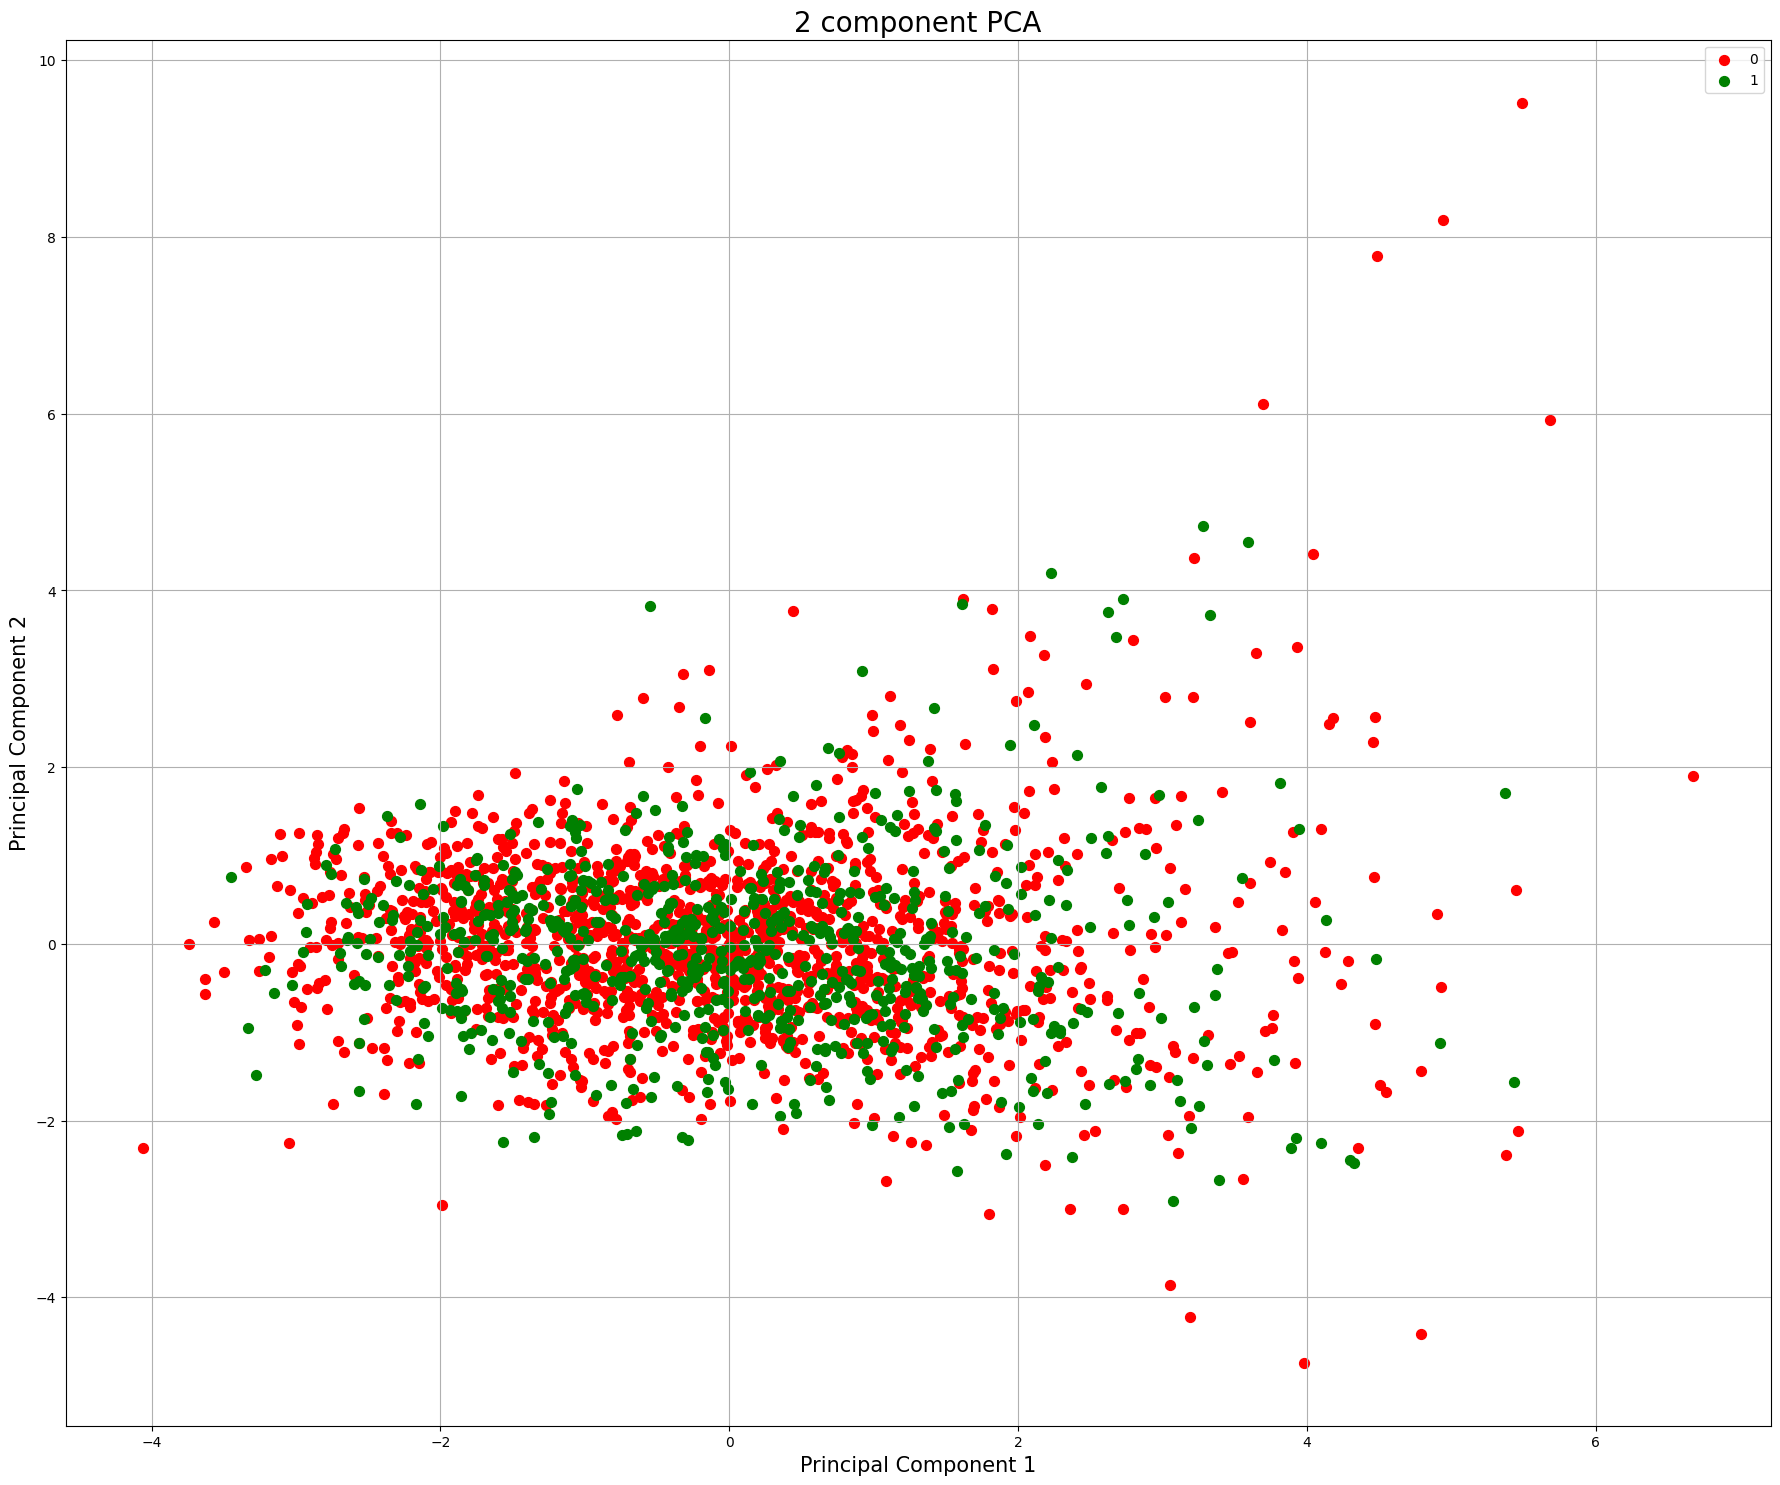

In [7]:
fig = plt.figure(figsize = (22,18))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['MetabolicSyndrome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

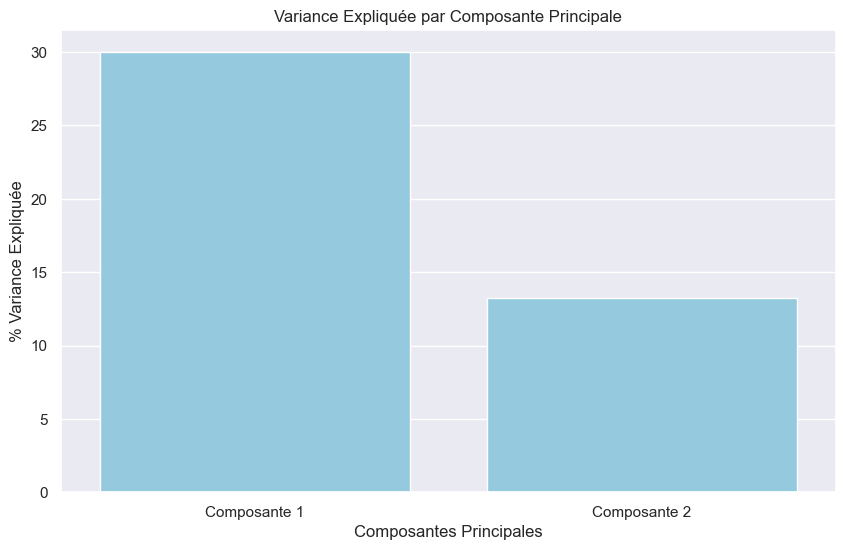

In [8]:
# Calculer la variance expliquée pour chaque composante principale
variance_explained = pca.explained_variance_
variance_explained_ratio = pca.explained_variance_ratio_

# Créer un DataFrame pour les données
components_df = pd.DataFrame({
    'Composantes': ['Composante {}'.format(i+1) for i in range(len(variance_explained))],
    'Variance Expliquée': variance_explained_ratio * 100
})

# Tracer l'histogramme de la variance expliquée
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(x='Composantes', y='Variance Expliquée', data=components_df, color='skyblue')
plt.title('Variance Expliquée par Composante Principale')
plt.xlabel('Composantes Principales')
plt.ylabel('% Variance Expliquée')
plt.show()



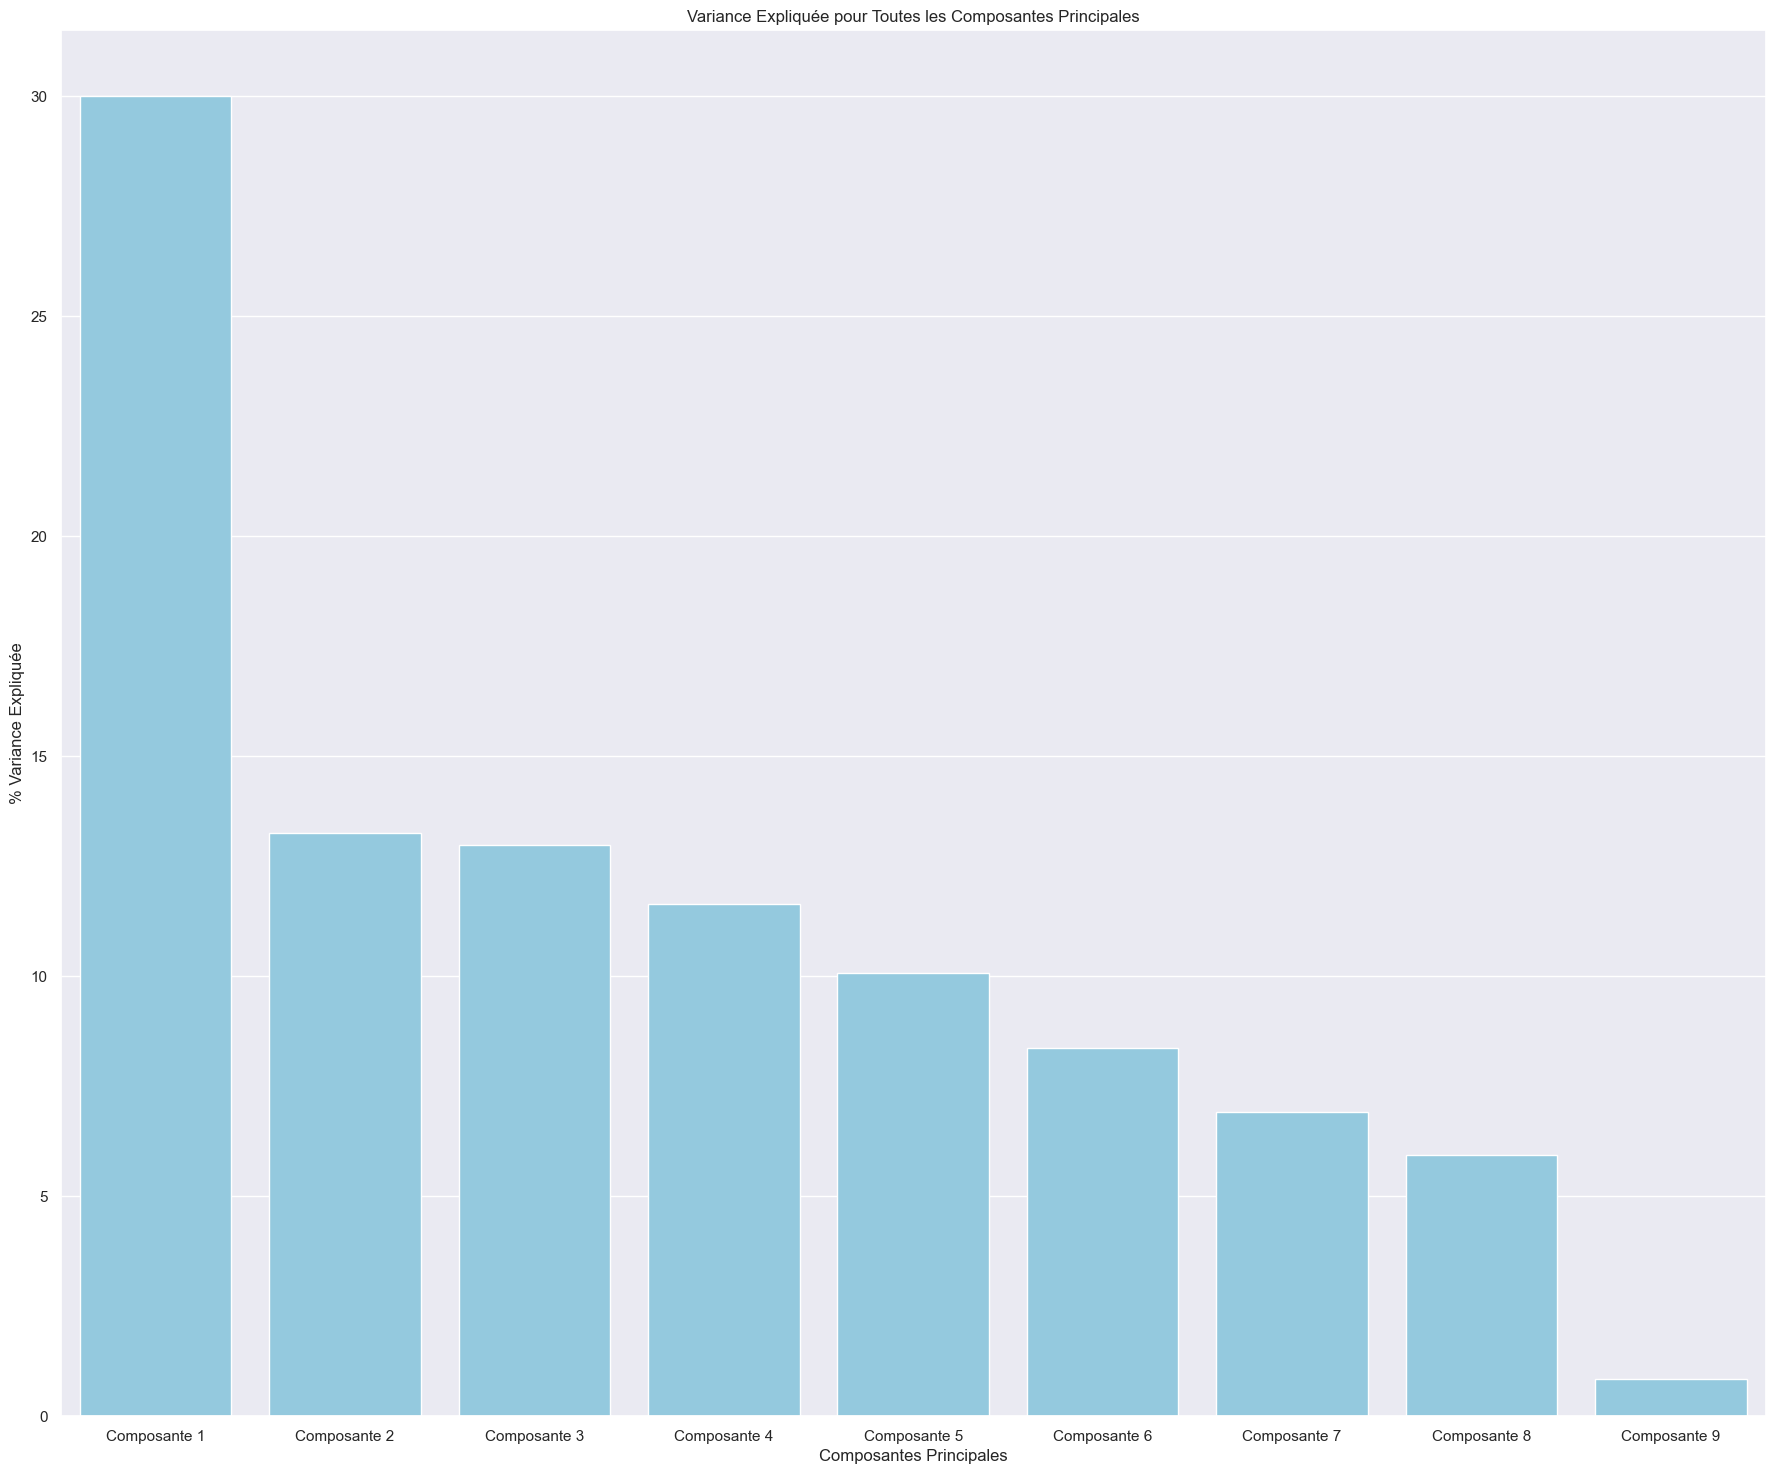

In [9]:
pca = PCA()
pca.fit(x)

# Calculer la variance expliquée pour chaque composante principale
variance_explained = pca.explained_variance_
total_variance = np.sum(variance_explained)

# Convertir en pourcentage
variance_explained_percent = (variance_explained / total_variance) * 100

# Créer un DataFrame pour les données
components_df = pd.DataFrame({
    'Composantes': ['Composante {}'.format(i+1) for i in range(len(variance_explained))],
    'Variance Expliquée': variance_explained_percent
})

# Tracer l'histogramme de la variance expliquée pour toutes les composantes principales
sns.set()
plt.figure(figsize=(22, 18))
sns.barplot(x='Composantes', y='Variance Expliquée', data=components_df, color='skyblue')
plt.title('Variance Expliquée pour Toutes les Composantes Principales')
plt.xlabel('Composantes Principales')
plt.ylabel('% Variance Expliquée')
plt.show()

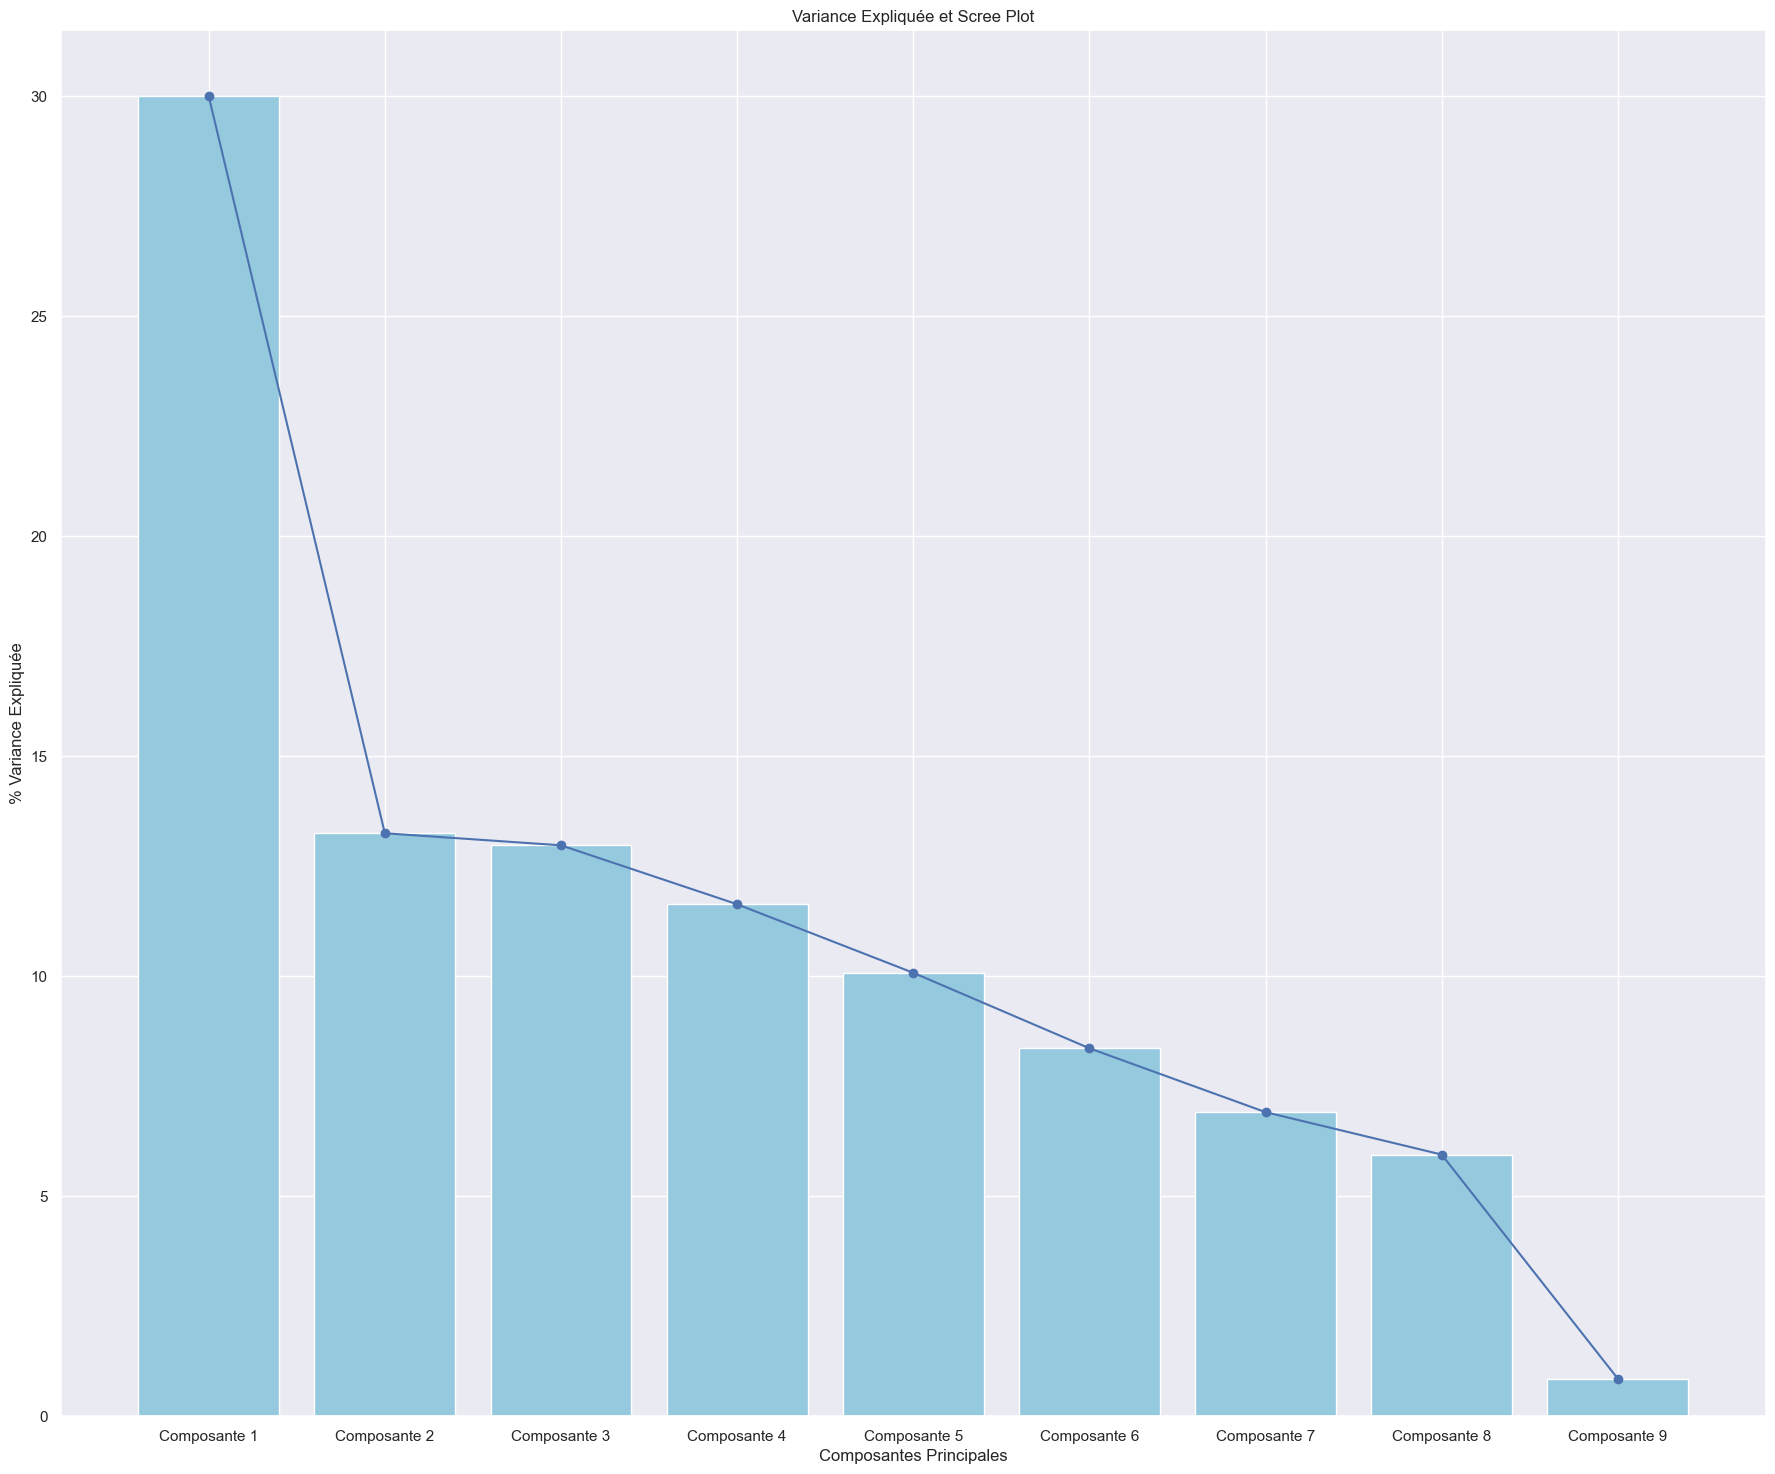

In [10]:
def plot_eigenvalues_scree_plot_with_histogram(variance_explained_percent):
    pca = PCA()
    pca.fit(x)

    # Calculer la variance expliquée pour chaque composante principale
    variance_explained = pca.explained_variance_
    total_variance = np.sum(variance_explained)

    # Convertir en pourcentage
    variance_explained_percent = (variance_explained / total_variance) * 100

    # Créer un DataFrame pour les données
    components_df = pd.DataFrame({
    'Composantes': ['Composante {}'.format(i+1) for i in range(len(variance_explained))],
    'Variance Expliquée': variance_explained_percent
    })

    plt.figure(figsize=(22, 18))

    # Plot histogram
    sns.barplot(x='Composantes', y='Variance Expliquée', data=components_df, color='skyblue')

    # Plot scree plot
    plt.plot(range(0, len(variance_explained_percent)), variance_explained_percent, marker='o', linestyle='-')
    
    plt.title('Variance Expliquée et Scree Plot')
    plt.xlabel('Composantes Principales')
    plt.ylabel('% Variance Expliquée')
    plt.xticks(range(0, len(variance_explained_percent)))
    plt.grid(True)
    plt.show()

plot_eigenvalues_scree_plot_with_histogram(variance_explained_percent)



On peut voir sur cette ACP qu'il n'y a aucun cluster, et donc pas de valeur beaucoup plus éloigné que les autres. 
Nous allons donc faire une ACP plus précise avec seulement les valeurs: "Age","BMI","BloodGlucose","HDL","Triglycerides"

In [11]:
features_2 = ["Age","BMI","BloodGlucose","HDL","Triglycerides"]
x2 = df.loc[:, features_2].values

x2 = StandardScaler().fit_transform(x2)

In [12]:
mask = ~np.isnan(x2).any(axis=1) & ~np.isinf(x2).any(axis=1)
x2 = x2[mask]

In [13]:
pca = PCA(n_components = 2)

principalComponents2 = pca.fit_transform(x2)
principalDf2 = pd.DataFrame(data = principalComponents2,
                           columns = ['principal component 1', 'principal component 2'])

In [14]:
finalDf2 = pd.concat([principalDf2, df[['MetabolicSyndrome']]], axis = 1)

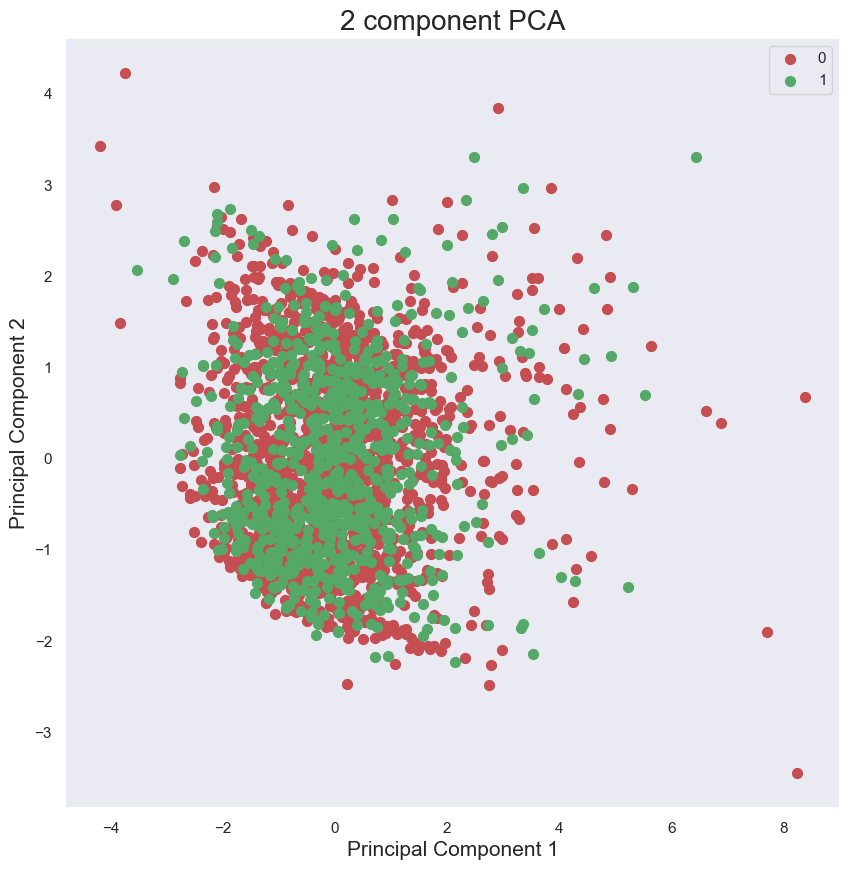

In [15]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['MetabolicSyndrome'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

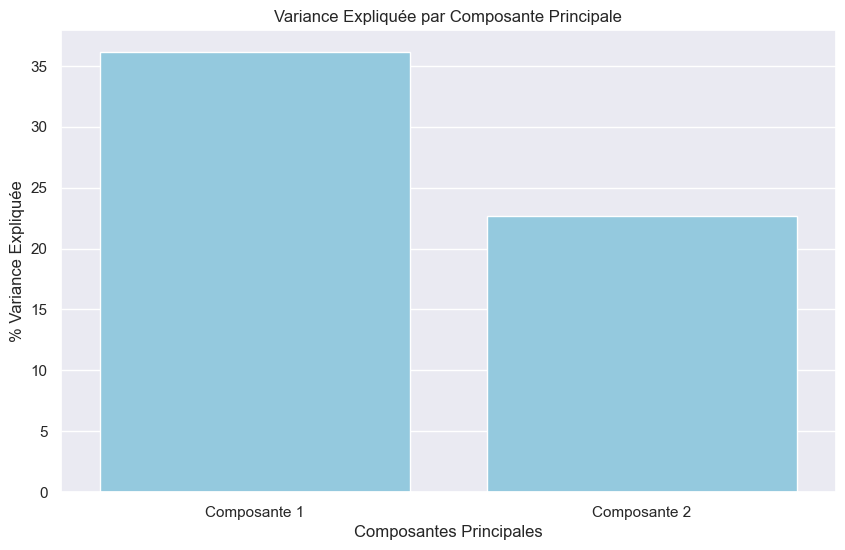

In [16]:
# Calculer la variance expliquée pour chaque composante principale
variance_explained = pca.explained_variance_
variance_explained_ratio = pca.explained_variance_ratio_

# Créer un DataFrame pour les données
components_df = pd.DataFrame({
    'Composantes': ['Composante {}'.format(i+1) for i in range(len(variance_explained))],
    'Variance Expliquée': variance_explained_ratio * 100
})

# Tracer l'histogramme de la variance expliquée
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(x='Composantes', y='Variance Expliquée', data=components_df, color='skyblue')
plt.title('Variance Expliquée par Composante Principale')
plt.xlabel('Composantes Principales')
plt.ylabel('% Variance Expliquée')
plt.show()


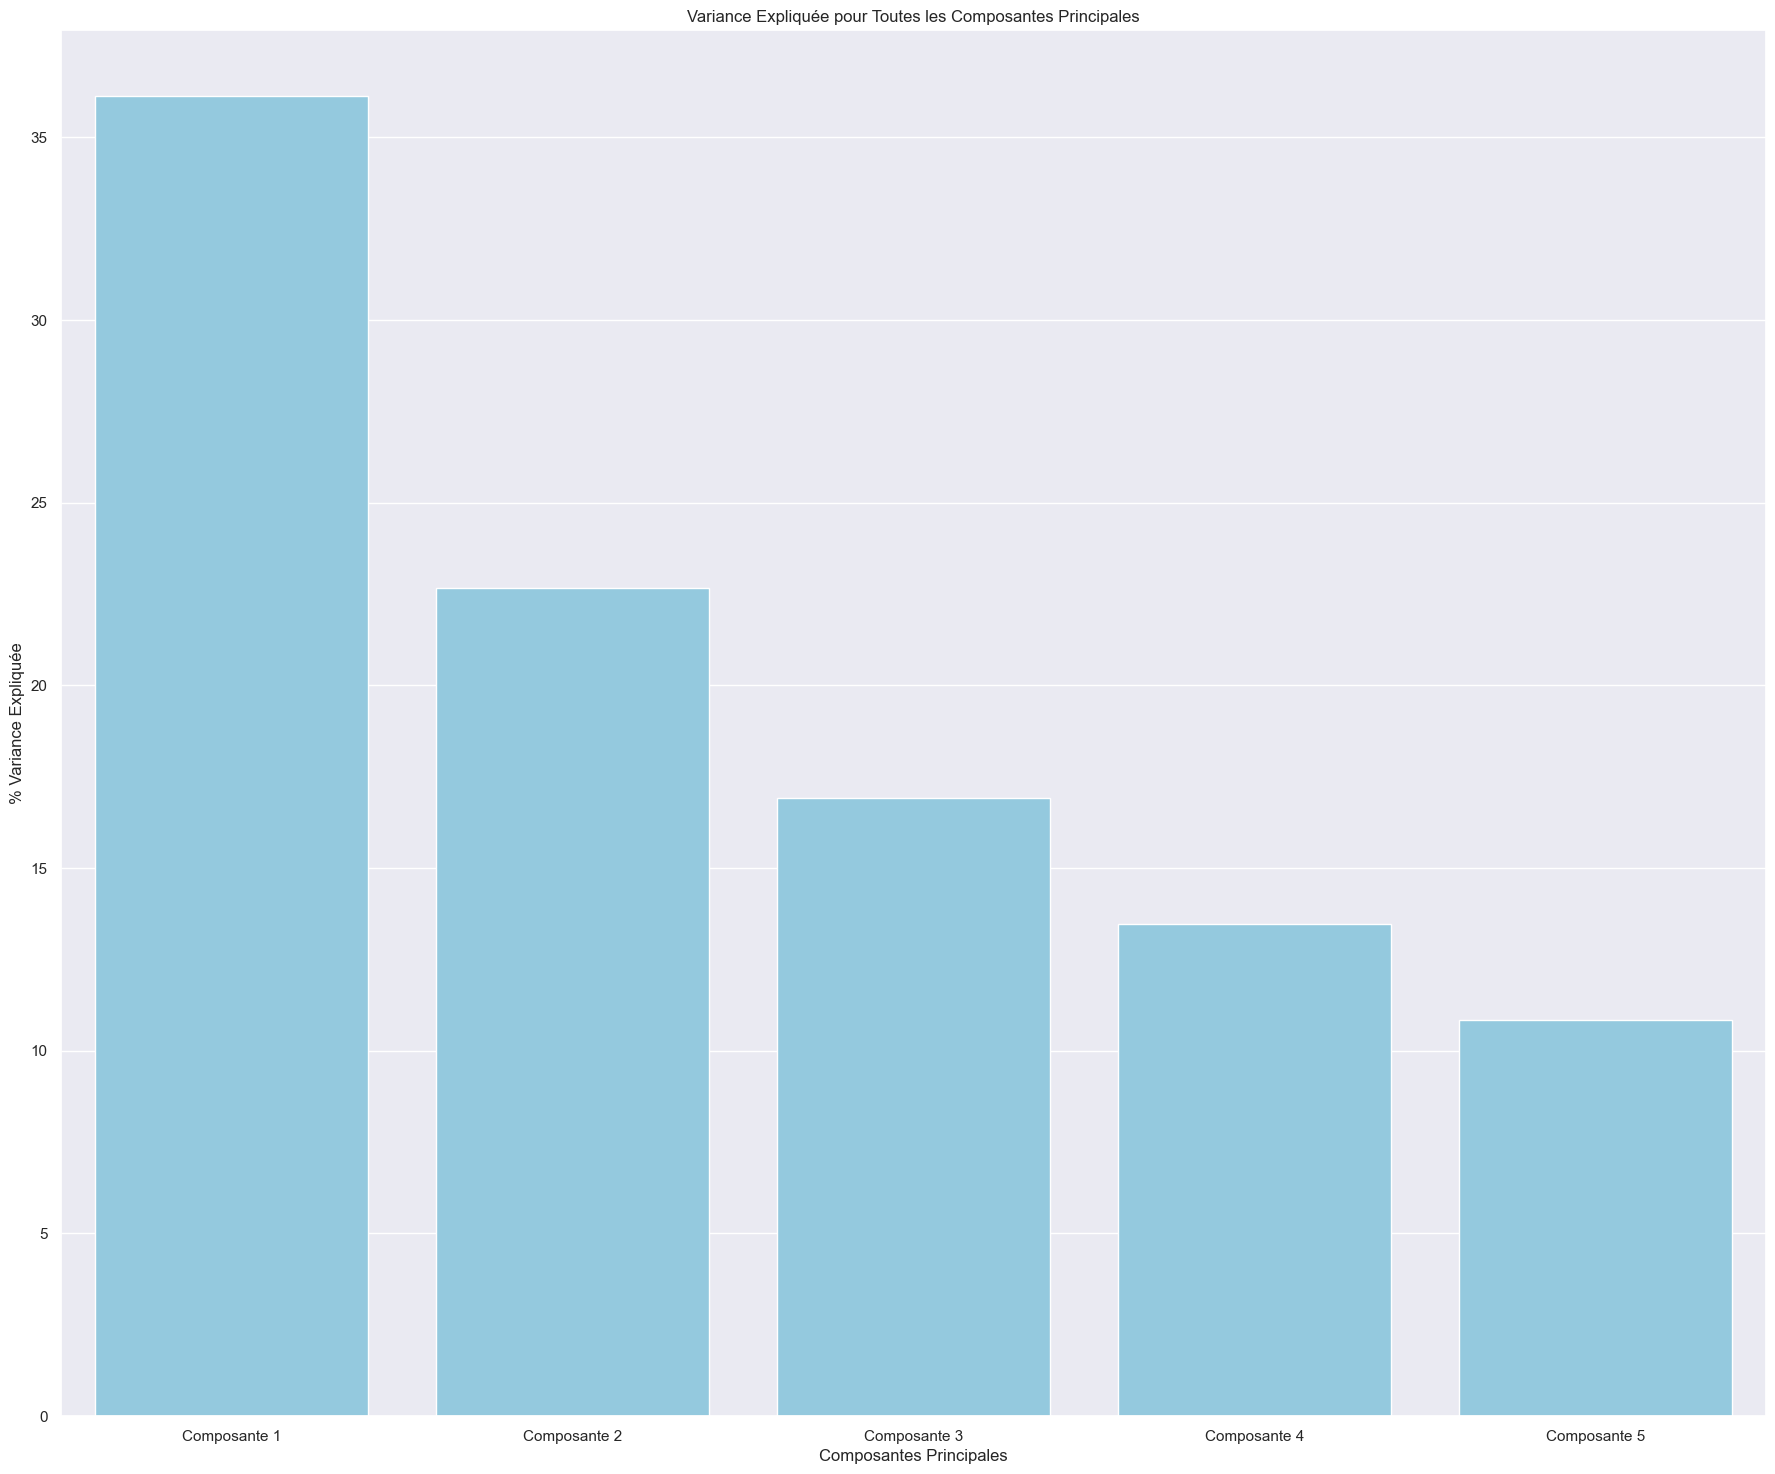

In [17]:
pca = PCA()
pca.fit(x2)

# Calculer la variance expliquée pour chaque composante principale
variance_explained = pca.explained_variance_
total_variance = np.sum(variance_explained)

# Convertir en pourcentage
variance_explained_percent = (variance_explained / total_variance) * 100

# Créer un DataFrame pour les données
components_df = pd.DataFrame({
    'Composantes': ['Composante {}'.format(i+1) for i in range(len(variance_explained))],
    'Variance Expliquée': variance_explained_percent
})

# Tracer l'histogramme de la variance expliquée pour toutes les composantes principales
sns.set()
plt.figure(figsize=(22, 18))
sns.barplot(x='Composantes', y='Variance Expliquée', data=components_df, color='skyblue')
plt.title('Variance Expliquée pour Toutes les Composantes Principales')
plt.xlabel('Composantes Principales')
plt.ylabel('% Variance Expliquée')
plt.show()

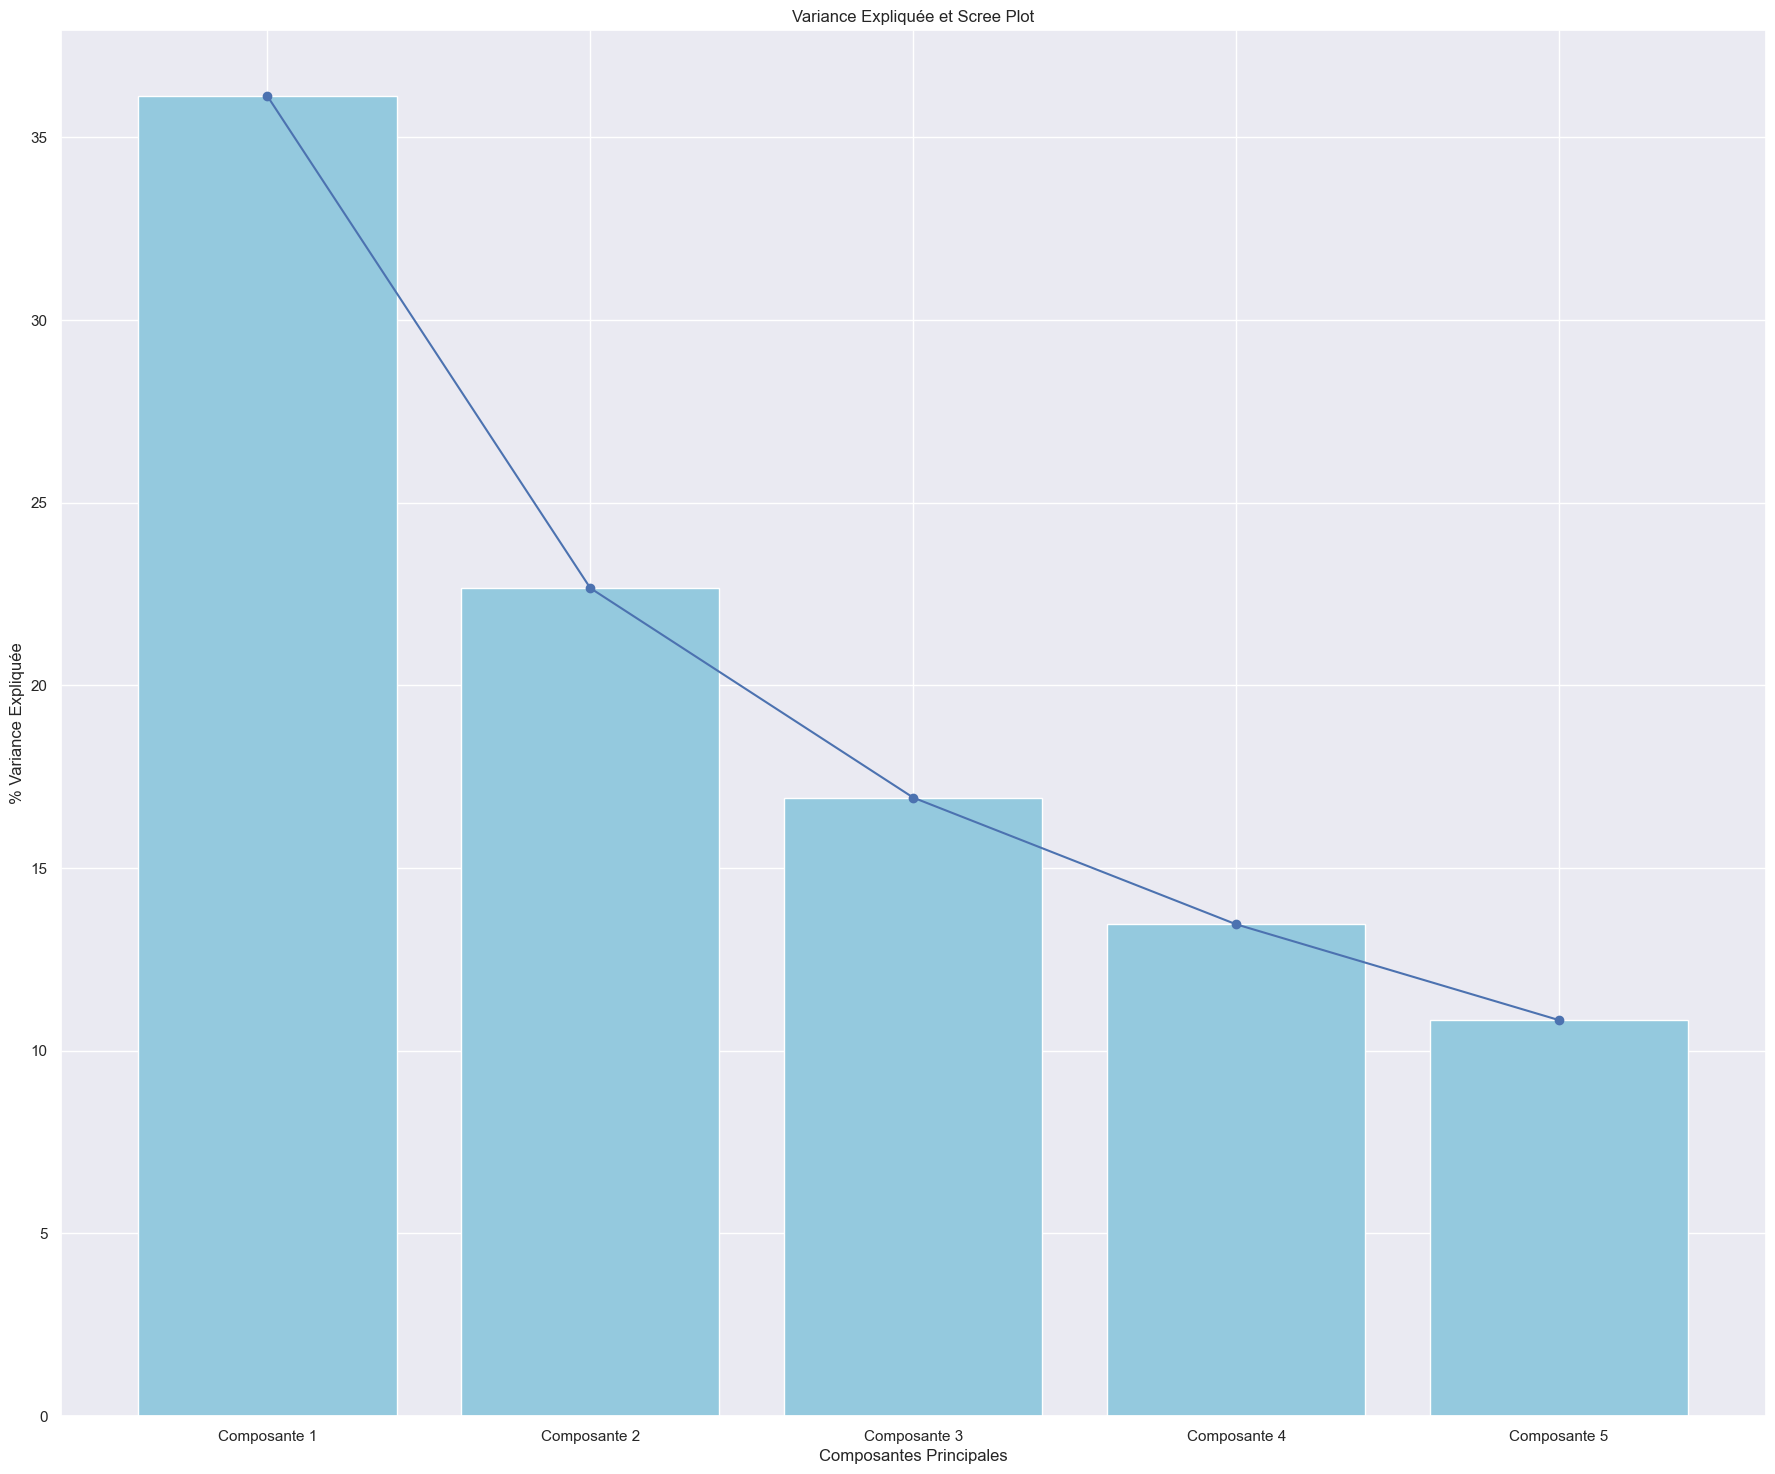

In [18]:
def plot_eigenvalues_scree_plot_with_histogram2(variance_explained_percent):
    pca = PCA()
    pca.fit(x2)

    # Calculer la variance expliquée pour chaque composante principale
    variance_explained = pca.explained_variance_
    total_variance = np.sum(variance_explained)

    # Convertir en pourcentage
    variance_explained_percent = (variance_explained / total_variance) * 100

    # Créer un DataFrame pour les données
    components_df = pd.DataFrame({
    'Composantes': ['Composante {}'.format(i+1) for i in range(len(variance_explained))],
    'Variance Expliquée': variance_explained_percent
    })

    plt.figure(figsize=(22, 18))

    # Plot histogram
    sns.barplot(x='Composantes', y='Variance Expliquée', data=components_df, color='skyblue')

    # Plot scree plot
    plt.plot(range(0, len(variance_explained_percent)), variance_explained_percent, marker='o', linestyle='-')
    
    plt.title('Variance Expliquée et Scree Plot')
    plt.xlabel('Composantes Principales')
    plt.ylabel('% Variance Expliquée')
    plt.xticks(range(0, len(variance_explained_percent)))
    plt.grid(True)
    plt.show()

plot_eigenvalues_scree_plot_with_histogram2(variance_explained_percent)

On observe de nouveau une ACP sans grande séparation. Essayons avec 2 éléments dont nous savons qu'ils sont loignés: "BloodGlucose","HDL"

In [19]:
features_3 = ["BloodGlucose","HDL"]
x3 = df.loc[:, features_3].values

x3 = StandardScaler().fit_transform(x3)

In [20]:
mask = ~np.isnan(x3).any(axis=1) & ~np.isinf(x3).any(axis=1)
x3 = x3[mask]

In [21]:
pca = PCA(n_components = 2)

principalComponents3 = pca.fit_transform(x3)
principalDf3 = pd.DataFrame(data = principalComponents3,
                           columns = ['principal component 1', 'principal component 2'])

In [22]:
finalDf3 = pd.concat([principalDf3, df[['MetabolicSyndrome']]], axis = 1)

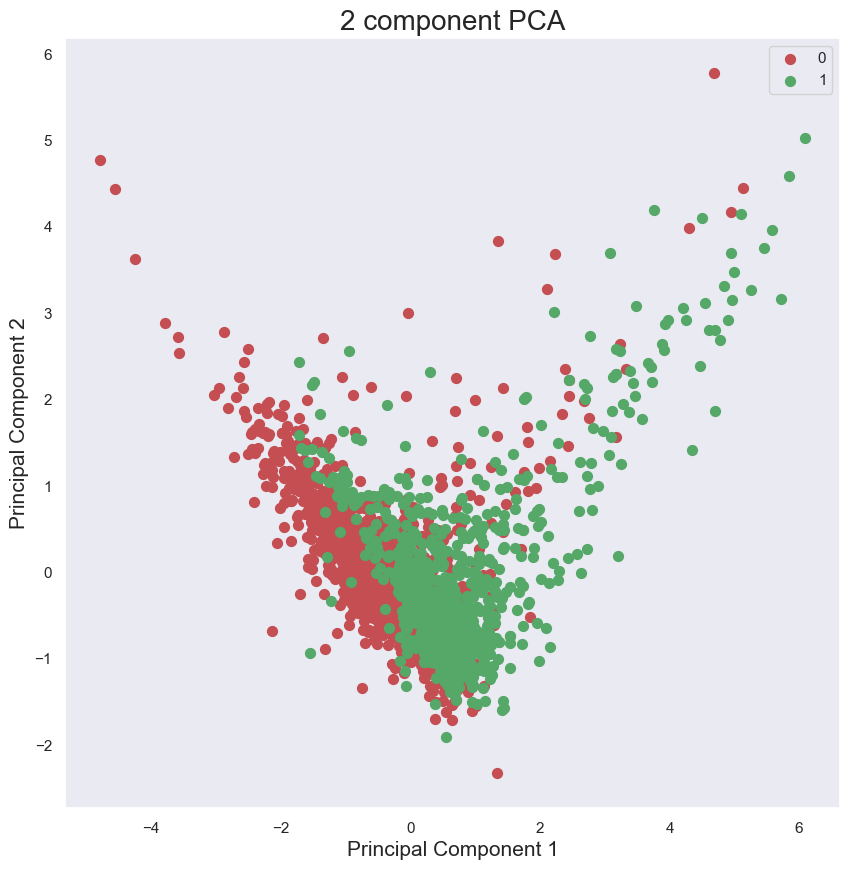

In [23]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf3['MetabolicSyndrome'] == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

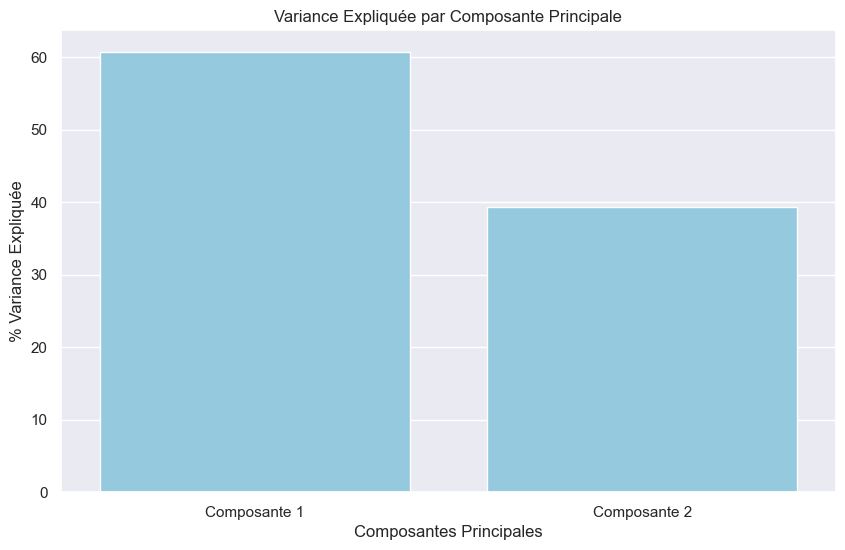

In [24]:
# Calculer la variance expliquée pour chaque composante principale
variance_explained = pca.explained_variance_
variance_explained_ratio = pca.explained_variance_ratio_

# Créer un DataFrame pour les données
components_df = pd.DataFrame({
    'Composantes': ['Composante {}'.format(i+1) for i in range(len(variance_explained))],
    'Variance Expliquée': variance_explained_ratio * 100
})

# Tracer l'histogramme de la variance expliquée
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(x='Composantes', y='Variance Expliquée', data=components_df, color='skyblue')
plt.title('Variance Expliquée par Composante Principale')
plt.xlabel('Composantes Principales')
plt.ylabel('% Variance Expliquée')
plt.show()


On peut voir sur cette PCA une séparation sur la composente principale 1. 
Mainteant on peut essayer avec seulement l'âge

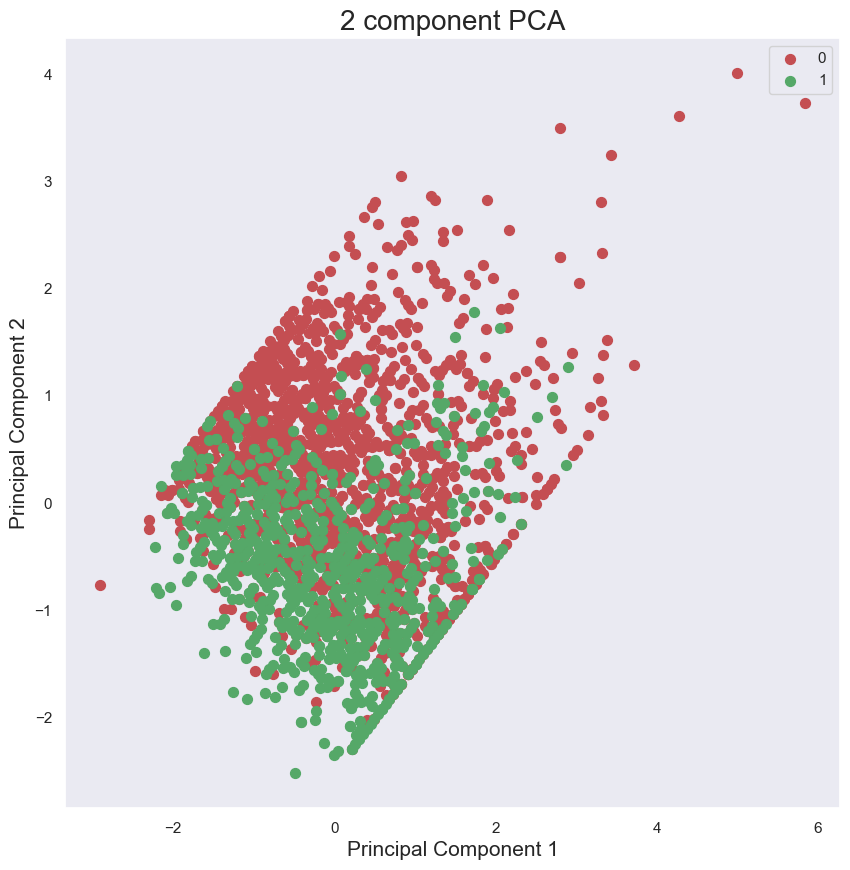

In [25]:
features_4 = ["Age","HDL"]
x4 = df.loc[:, features_4].values

x4 = StandardScaler().fit_transform(x4)

mask = ~np.isnan(x4).any(axis=1) & ~np.isinf(x4).any(axis=1)
x4 = x4[mask]

pca = PCA(n_components =2)

principalComponents4 = pca.fit_transform(x4)
principalDf4 = pd.DataFrame(data = principalComponents4,
                           columns = ['principal component 1', 'principal component 2'])

finalDf4 = pd.concat([principalDf4, df[['MetabolicSyndrome']]], axis = 1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf4['MetabolicSyndrome'] == target
    ax.scatter(finalDf4.loc[indicesToKeep, 'principal component 1']
               , finalDf4.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

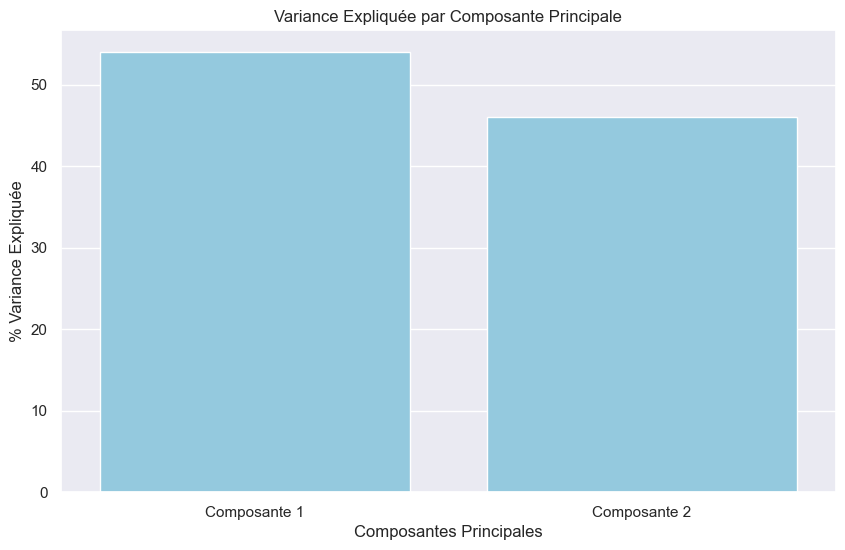

In [26]:
# Calculer la variance expliquée pour chaque composante principale
variance_explained = pca.explained_variance_
variance_explained_ratio = pca.explained_variance_ratio_

# Créer un DataFrame pour les données
components_df = pd.DataFrame({
    'Composantes': ['Composante {}'.format(i+1) for i in range(len(variance_explained))],
    'Variance Expliquée': variance_explained_ratio * 100
})

# Tracer l'histogramme de la variance expliquée
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(x='Composantes', y='Variance Expliquée', data=components_df, color='skyblue')
plt.title('Variance Expliquée par Composante Principale')
plt.xlabel('Composantes Principales')
plt.ylabel('% Variance Expliquée')
plt.show()


Je crois que le parametre Age fait des choses étranges ahah